In [7]:
import pandas as pd 
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# Set option max columns display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

In [8]:
# df_ss = pd.read_csv('sample_submission.csv')

# EDA

In [33]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.drop(columns = 'Unnamed: 0')
df_test = df_test.drop(columns = 'Unnamed: 0')
df_train['Incident Datetime'] = pd.to_datetime(df_train['Incident Datetime'])
df_test['Incident Datetime'] = pd.to_datetime(df_test['Incident Datetime'])

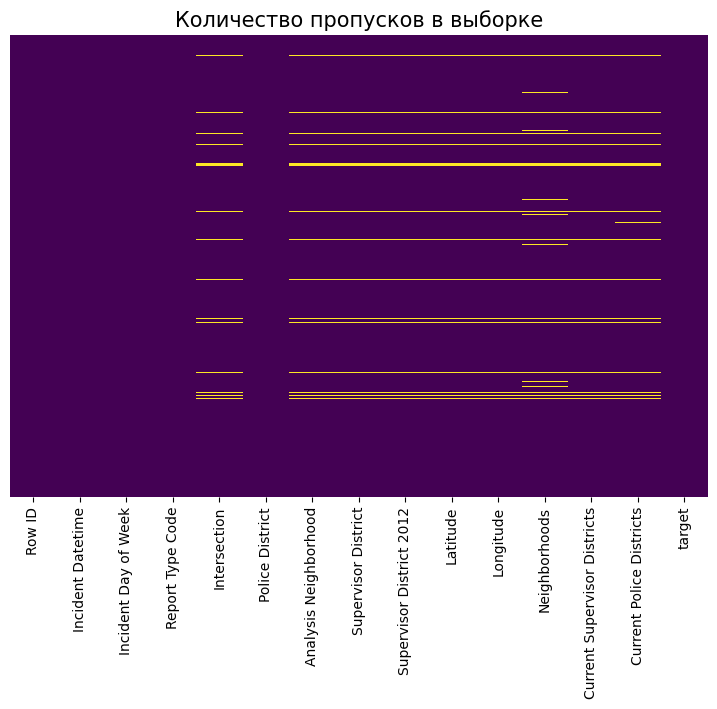

In [34]:
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title('Количество пропусков в выборке', fontsize=15)
sns_heatmap = sns.heatmap(df_train.isnull(),
                          yticklabels=False,
                          cbar=False,
                          cmap='viridis')

In [35]:
fillna_cols = ['Supervisor District',
       'Supervisor District 2012', 'Neighborhoods',
       'Current Supervisor Districts', 'Current Police Districts']


df_train[fillna_cols] = df_train[fillna_cols].fillna(9999).astype(int)
df_test[fillna_cols] = df_test[fillna_cols].fillna(9999).astype(int)

In [36]:
# dtype = {'Supervisor District' : int,
#         'Supervisor District 2012': int,
#         'Neighborhoods': int, 
#         'Current Supervisor Districts' : int,
#         'Current Police Districts': int
#         }

In [37]:
# описательная таблица
def descr_table(df: pd.DataFrame) -> pd.DataFrame:
    list_item = []
    for col in df.columns:
        list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
    desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
    return desc_df


In [38]:
descr_table(df_train)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Row ID,int64,0,0.000000,391750,"[86814469434, 112210668395, 79810969452, 12778..."
1,Incident Datetime,datetime64[ns],0,0.000000,245975,"[2019-11-08 14:00:00, 2022-02-15 16:30:00, 201..."
2,Incident Day of Week,object,0,0.000000,7,"[Friday, Tuesday, Sunday, Saturday]"
3,Report Type Code,object,0,0.000000,4,"[IS, II, VS, VI]"
4,Intersection,object,17129,4.372431,6364,"[MARKET ST \ POWELL ST, FRESNO ST \ GRANT AVE,..."
5,Police District,object,0,0.000000,11,"[Tenderloin, Central, Ingleside, Mission]"
6,Analysis Neighborhood,object,17225,4.396937,41,"[Financial District/South Beach, North Beach, ..."
7,Supervisor District,int64,0,0.000000,12,"[6, 3, 11, 9]"
8,Supervisor District 2012,int64,0,0.000000,12,"[3, 11, 10, 8]"
9,Latitude,float64,17129,4.372431,6451,"[37.784560141211806, 37.79848980264107, 37.797..."


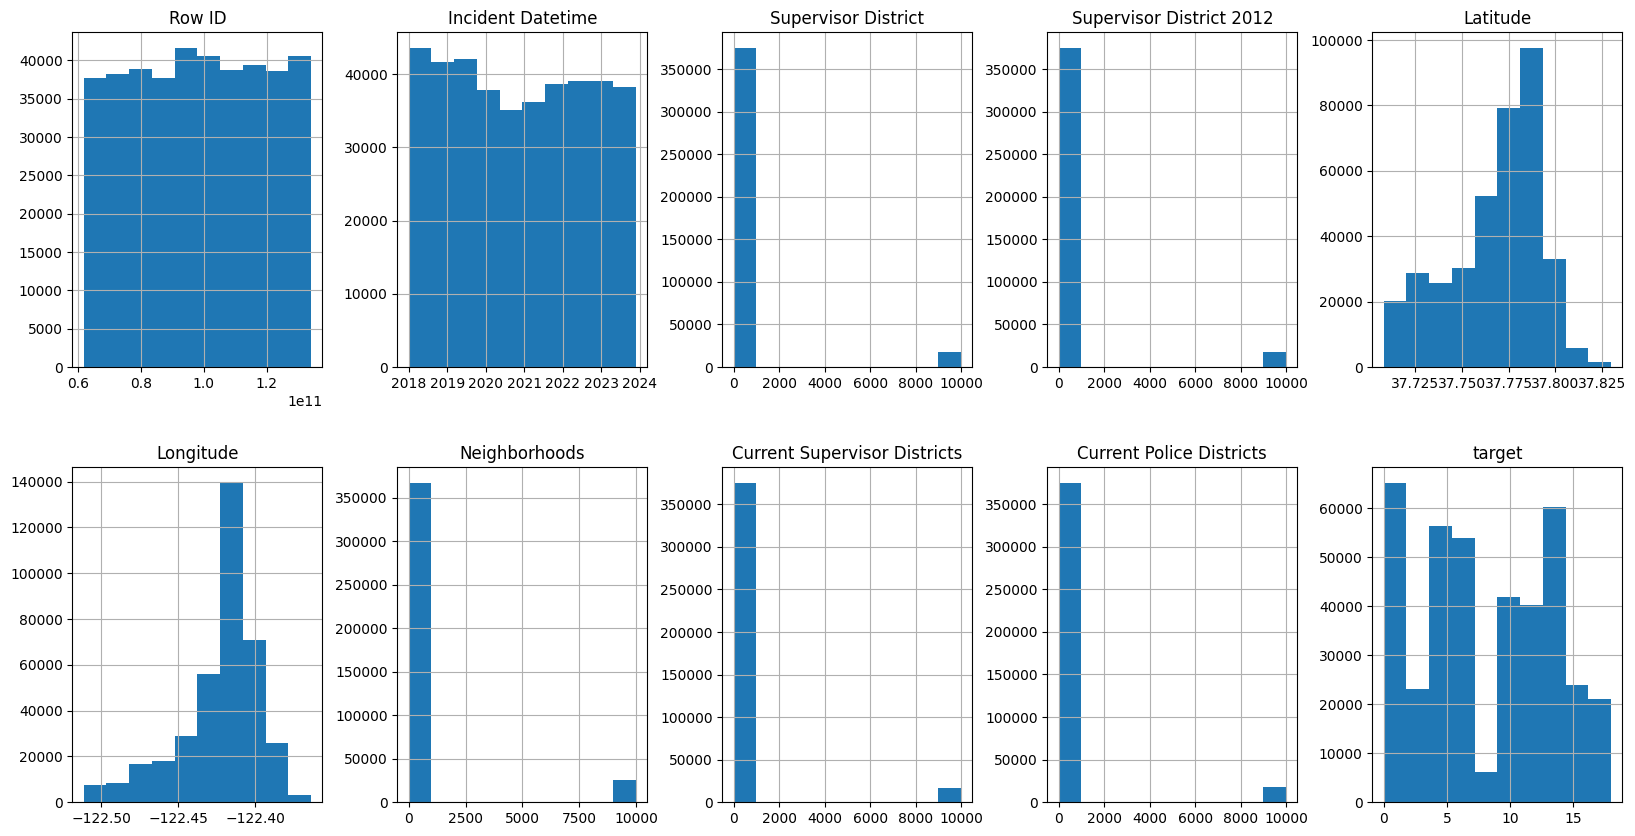

In [39]:
df_train.hist(figsize=(20, 10), layout=(-1, 5))
plt.show()

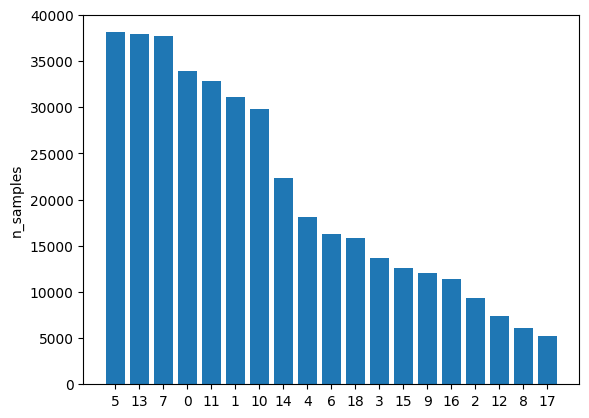

In [40]:
# ДИЗбаланс классов
dfg = df_train['target'].value_counts(dropna=False).reset_index().sort_values(by='count', ascending=False)
plt.bar(dfg['target'].astype(str), dfg['count'])
plt.ylabel("n_samples")
# plt.ylim([0, 75])
plt.show()

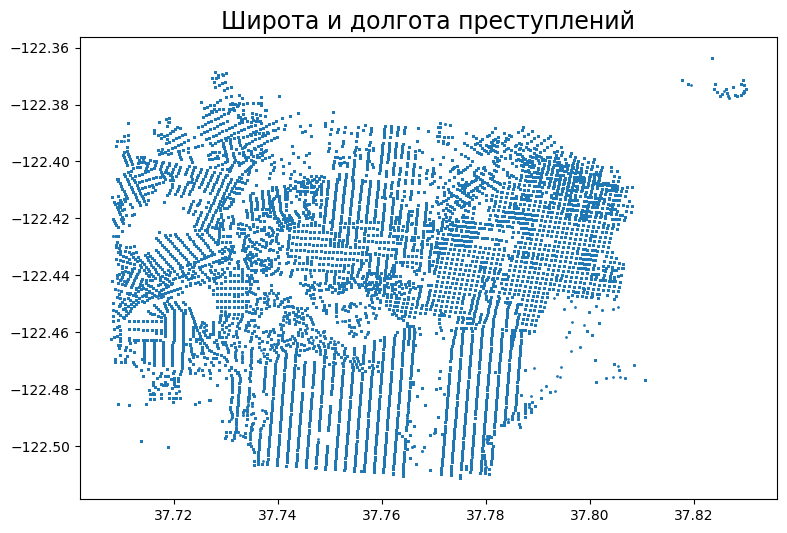

In [41]:
plt.figure(figsize = (9, 6))
plt.scatter(df_train['Latitude'], df_train['Longitude'], s=1)
plt.title('Широта и долгота преступлений', fontsize=17)

plt.show()

In [42]:
# как будто хорошо будет натравить сюда UMAP

In [43]:
df_train.head()

,Row ID,Incident Datetime,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,target
0,86814469434,2019-11-08 14:00:00,Friday,IS,MARKET ST \ POWELL ST,Tenderloin,Financial District/South Beach,6,3,37.784560,-122.407337,19,3,5,1
1,112210668395,2022-02-15 16:30:00,Tuesday,II,FRESNO ST \ GRANT AVE,Central,North Beach,3,3,37.798490,-122.407149,106,3,6,0
2,79810969452,2019-05-05 03:30:00,Sunday,IS,OSGOOD PL \ PACIFIC AVE,Central,North Beach,3,3,37.797396,-122.402887,106,3,6,1
3,127781292541,2023-05-20 18:00:00,Saturday,II,GENEVA AVE \ MOSCOW ST \ SOUTH HILL BLVD,Ingleside,Excelsior,11,11,37.713143,-122.433707,58,1,9,7
4,73242481031,2018-10-30 02:31:00,Tuesday,IS,THORNTON AVE \ BAY SHORE BLVD \ CARROLL AVE,Ingleside,Portola,9,10,37.730658,-122.403400,91,9,2,3


## Генерация дополнительных фичей

In [44]:
df_split = df_train['Intersection'].str.split(r' \\ ', expand=True)
df_split = df_split.rename(columns={0: 'Street 1', 1: 'Street 2', 2: 'Street 3', 3:'Street 4', 4:'Street 5'})


df_split_test = df_test['Intersection'].str.split(r' \\ ', expand=True)
df_split_test = df_split_test.rename(columns={0: 'Street 1', 1: 'Street 2', 2: 'Street 3', 3:'Street 4', 4:'Street 5'})

In [45]:
df_train = pd.concat([df_train, df_split], axis=1)
df_test = pd.concat([df_test, df_split_test], axis=1)

In [46]:
## ВРЕМЯ

df_train['Hour'] = pd.to_datetime(df_train['Incident Datetime']).dt.hour
df_train['Month'] = pd.to_datetime(df_train['Incident Datetime']).dt.month
df_train['Day_of_Year'] = pd.to_datetime(df_train['Incident Datetime']).dt.dayofyear
df_train['Is_Weekend'] = df_train['Incident Day of Week'].isin(['Saturday', 'Sunday']).astype(int)
df_train['Quarter'] = df_train['Incident Datetime'].dt.quarter

## комбинация места и времени 
df_train['District_Hour_Combo'] = df_train['Police District'] + '_' + df_train['Hour'].astype(str)

# Признак времени с момента последнего инцидента в районе
df_train['Incident Datetime'] = pd.to_datetime(df_train['Incident Datetime'])
df_train['Time_Since_Last_Incident'] = df_train.groupby('Neighborhoods')['Incident Datetime'].diff().dt.total_seconds() / 3600


# для тестовой

df_test['Hour'] = pd.to_datetime(df_test['Incident Datetime']).dt.hour
df_test['Month'] = pd.to_datetime(df_test['Incident Datetime']).dt.month
df_test['Day_of_Year'] = pd.to_datetime(df_test['Incident Datetime']).dt.dayofyear
df_test['Is_Weekend'] = df_test['Incident Day of Week'].isin(['Saturday', 'Sunday']).astype(int)
df_test['Quarter'] = df_test['Incident Datetime'].dt.quarter

## комбинация места и времени 
df_test['District_Hour_Combo'] = df_test['Police District'] + '_' + df_test['Hour'].astype(str)


# Признак времени с момента последнего инцидента в районе
df_test['Incident Datetime'] = pd.to_datetime(df_test['Incident Datetime'])
df_test['Time_Since_Last_Incident'] = df_test.groupby('Neighborhoods')['Incident Datetime'].diff().dt.total_seconds() / 3600



In [47]:
## География 
from geopy.distance import great_circle

city_center = (37.7749, -122.4194)  # координаты центра Сан-Франциско

# Заполним пропуски координатами центра города
df_train['Latitude'].fillna(city_center[0], inplace=True)
df_train['Longitude'].fillna(city_center[1], inplace=True)

df_train['Distance_to_Center'] = df_train.apply(lambda row: great_circle((row['Latitude'], row['Longitude']), city_center).kilometers, axis=1)

## плотность инцидентов в районе 
df_train['Incident_Count_Neighborhood'] = df_train.groupby('Analysis Neighborhood')['Row ID'].transform('count')

# Количество инцидентов в районе за последний месяц
df_train['Incident_Count_Last_Month'] = df_train.groupby(['Neighborhoods', df_train['Incident Datetime'].dt.to_period('M')])['Incident Datetime'].transform('count')

## количество улиц в пересечении 
df_train['Intersection_Count'] = df_train['Intersection'].str.count(r'\\') + 1

# Наиболее частый тип инцидента в районе
df_train['Most_Common_Report_Type_Neighborhood'] = df_train.groupby('Neighborhoods')['Report Type Code'].transform(lambda x: x.mode()[0])

# Соотношение инцидентов в выходные к общему количеству инцидентов в полицейском округе
weekend_incidents = df_train[df_train['Is_Weekend'] == 1].groupby('Police District').size()
total_incidents = df_train.groupby('Police District').size()
df_train['Weekend_Incident_Rate'] = df_train['Police District'].map(weekend_incidents / total_incidents)

#Для тестовой

# Заполним пропуски координатами центра города
df_test['Latitude'].fillna(city_center[0], inplace=True)
df_test['Longitude'].fillna(city_center[1], inplace=True)

df_test['Distance_to_Center'] = df_test.apply(lambda row: great_circle((row['Latitude'], row['Longitude']), city_center).kilometers, axis=1)

## плотность инцидентов в районе 
df_test['Incident_Count_Neighborhood'] = df_test.groupby('Analysis Neighborhood')['Row ID'].transform('count')

# Количество инцидентов в районе за последний месяц
df_test['Incident_Count_Last_Month'] = df_test.groupby(['Neighborhoods', df_test['Incident Datetime'].dt.to_period('M')])['Incident Datetime'].transform('count')

## количество улиц в пересечении 
df_test['Intersection_Count'] = df_test['Intersection'].str.count(r'\\') + 1

# Наиболее частый тип инцидента в районе
df_test['Most_Common_Report_Type_Neighborhood'] = df_test.groupby('Neighborhoods')['Report Type Code'].transform(lambda x: x.mode()[0])

# Соотношение инцидентов в выходные к общему количеству инцидентов в полицейском округе
weekend_incidents = df_test[df_test['Is_Weekend'] == 1].groupby('Police District').size()
total_incidents = df_test.groupby('Police District').size()
df_test['Weekend_Incident_Rate'] = df_test['Police District'].map(weekend_incidents / total_incidents)



/var/folders/08/mfgychy5141_ls54j4qngy900000gp/T/ipykernel_1624/1513329999.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Latitude'].fillna(city_center[0], inplace=True)
/var/folders/08/mfgychy5141_ls54j4qngy900000gp/T/ipykernel_1624/1513329999.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [48]:
# Взаимодействие Neighborhood и Police District
df_train['Neighborhood_District_Combo'] = df_train['Neighborhoods'].astype(str) + '_' + df_train['Police District'].astype(str)

# Взаимодействие типа отчета и времени суток
df_train['ReportType_Hour_Interaction'] = df_train['Report Type Code'].astype(str) + '_' + df_train['Hour'].astype(str)

# Взаимодействие Supervisor District и времени суток
df_train['Supervisor_Hour_Interaction'] = df_train['Supervisor District'].astype(str) + '_' + df_train['Hour'].astype(str)

#Для тестовой

# Взаимодействие Neighborhood и Police District
df_test['Neighborhood_District_Combo'] = df_test['Neighborhoods'].astype(str) + '_' + df_test['Police District'].astype(str)

# Взаимодействие типа отчета и времени суток
df_test['ReportType_Hour_Interaction'] = df_test['Report Type Code'].astype(str) + '_' + df_test['Hour'].astype(str)

# Взаимодействие Supervisor District и времени суток
df_test['Supervisor_Hour_Interaction'] = df_test['Supervisor District'].astype(str) + '_' + df_test['Hour'].astype(str)

In [49]:
## изменился ли округ с 12го года 

df_train['District_Changed'] = (df_train['Supervisor District'] != df_train['Supervisor District 2012']).astype(int)

## размер округа 
df_train['Incident_Density'] = df_train.groupby('Police District')['Row ID'].transform('count') / df_train.groupby('Police District')['Row ID'].transform(lambda x: x.size)


#для тестовой 

df_test['District_Changed'] = (df_test['Supervisor District'] != df_test['Supervisor District 2012']).astype(int)

## размер округа 
df_test['Incident_Density'] = df_test.groupby('Police District')['Row ID'].transform('count') / df_test.groupby('Police District')['Row ID'].transform(lambda x: x.size)



In [29]:
from sklearn.cluster import KMeans

# Кластеризация на основе координат, чтобы выделить схожие районы
kmeans = KMeans(n_clusters=10, random_state=42)
df_train['Neighborhood_Cluster'] = kmeans.fit_predict(df_train[['Latitude', 'Longitude']])

# Подсчет плотности инцидентов на основе кластеров за последние 30 дней
df_train['Incident_Datetime'] = pd.to_datetime(df_train['Incident Datetime'])  # убедимся, что это datetime

incident_density_per_cluster = (
    df_train.set_index('Incident Datetime')
    .groupby('Neighborhood_Cluster')
    .resample('30D')
    .size()
    .reset_index(name='Cluster_Incident_Density')
)

df_train = df_train.merge(incident_density_per_cluster, on=['Incident Datetime', 'Neighborhood_Cluster'], how='left')

In [30]:
kmeans = KMeans(n_clusters=10, random_state=42)
df_test['Neighborhood_Cluster'] = kmeans.fit_predict(df_test[['Latitude', 'Longitude']])

# Подсчет плотности инцидентов на основе кластеров за последние 30 дней
df_test['Incident_Datetime'] = pd.to_datetime(df_test['Incident Datetime'])  

incident_density_per_cluster = (
    df_test.set_index('Incident Datetime')
    .groupby('Neighborhood_Cluster')
    .resample('30D')
    .size()
    .reset_index(name='Cluster_Incident_Density')
)

df_test = df_test.merge(incident_density_per_cluster, on=['Incident Datetime', 'Neighborhood_Cluster'], how='left')

In [55]:
df_test.head()

,Row ID,Incident Datetime,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,Street 1,Street 2,Street 3,Street 4,Street 5,Hour,Month,Day_of_Year,Is_Weekend,Quarter,District_Hour_Combo,Time_Since_Last_Incident,Distance_to_Center,Incident_Count_Neighborhood,Incident_Count_Last_Month,Intersection_Count,Most_Common_Report_Type_Neighborhood,Weekend_Incident_Rate,Neighborhood_District_Combo,ReportType_Hour_Interaction,Supervisor_Hour_Interaction,District_Changed,Incident_Density
0,132396290461,2023-09-30 14:06:00,Saturday,II,ELLIS ST \ POWELL ST,Central,Financial District/South Beach,3,3,37.785492,-122.407853,19,3,6,ELLIS ST,POWELL ST,None,None,None,14,9,273,1,3,Central_14,NaN,1.554659,11741.0,58,2.0,II,0.284234,19_Central,II_14,3_14,0,1.0
1,129766528471,2023-07-17 22:00:00,Monday,II,NATOMA ST \ MARY ST,Southern,South of Market,6,6,37.781306,-122.406248,32,10,1,NATOMA ST,MARY ST,None,None,None,22,7,198,0,3,Southern_22,NaN,1.357758,14427.0,278,2.0,II,0.269686,32_Southern,II_22,6_22,0,1.0
2,103051371424,2021-05-15 17:47:00,Saturday,VS,NaN,Out of SF,NaN,9999,9999,37.774900,-122.419400,9999,9999,9999,NaN,NaN,NaN,NaN,NaN,17,5,135,1,2,Out of SF_17,NaN,0.000000,NaN,142,NaN,II,0.215899,9999_Out of SF,VS_17,9999_17,0,1.0
3,96400173701,2020-06-18 00:01:00,Thursday,II,04TH ST \ LONG BRIDGE ST,Out of SF,Mission Bay,6,6,37.773467,-122.391434,34,10,1,04TH ST,LONG BRIDGE ST,None,None,None,0,6,170,0,2,Out of SF_0,NaN,2.463120,3011.0,28,2.0,II,0.215899,34_Out of SF,II_0,6_0,0,1.0
4,109718870743,2021-11-05 10:14:00,Friday,II,04TH ST \ MINNA ST,Southern,Financial District/South Beach,6,6,37.784044,-122.403712,32,10,1,04TH ST,MINNA ST,None,None,None,10,11,309,0,4,Southern_10,-14867.766667,1.713164,11741.0,245,2.0,II,0.269686,32_Southern,II_10,6_10,0,1.0


## Фик корреляция

In [22]:
import phik

In [23]:
dataset = df_train.drop(columns = ['Incident Datetime', 'Row ID']).sample(500)

In [24]:
phik_df = dataset.phik_matrix(interval_cols=['Latitude', 'Longitude'])

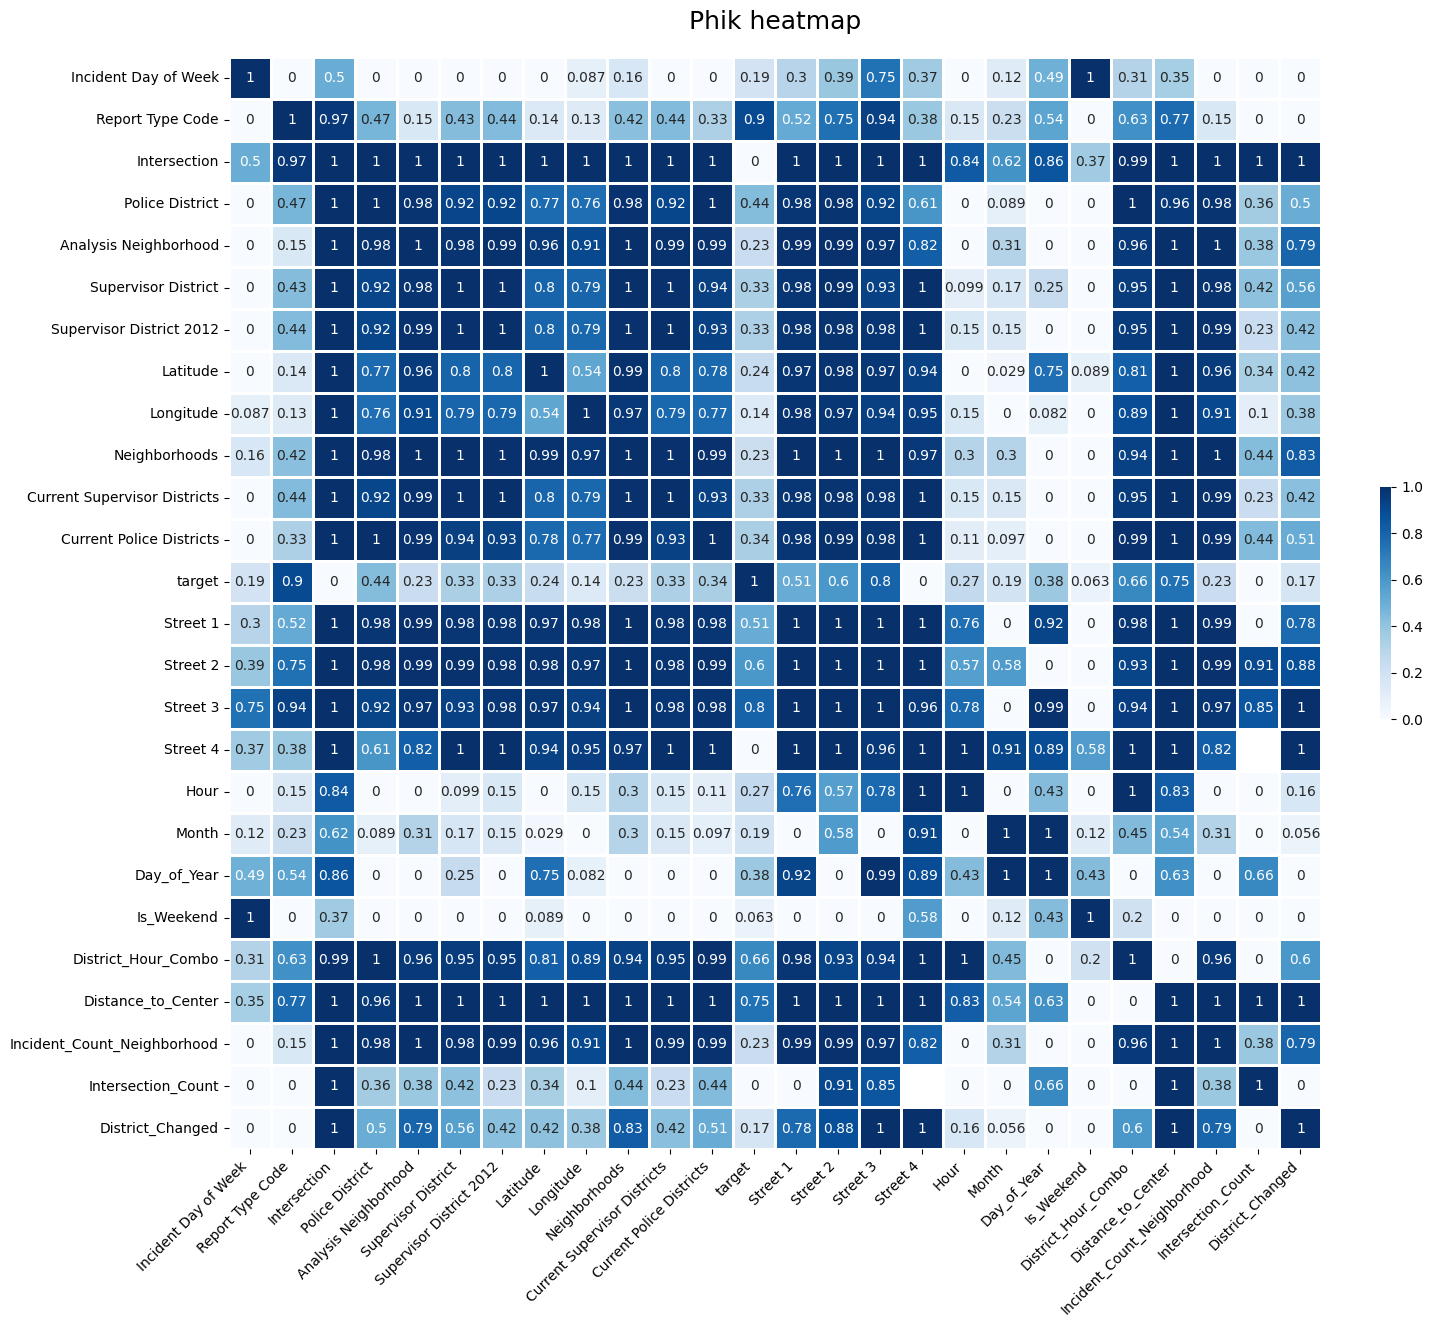

In [25]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(phik_df,
                      annot=True,
                        square=True,
                        cmap="Blues",
                        vmax=1,
                        vmin=0,
                        cbar_kws={"fraction": 0.01},  # shrink colour bar
                        linewidth=2,)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Phik heatmap", fontdict={"fontsize": 18}, pad=20)
plt.show()

# Балансировка

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Загрузка данных
# df_train и df_test — ваши исходные тренировочные и тестовые датасеты

# Определение категориальных и числовых признаков
categorical_features = [
    'Incident Day of Week', 'Report Type Code', 'Intersection', 'Police District',
    'Analysis Neighborhood', 'Street 1', 'Street 2', 'Street 3', 'Street 4', 'Street 5',
    'District_Hour_Combo', 'Most_Common_Report_Type_Neighborhood', 'Neighborhood_District_Combo',
    'ReportType_Hour_Interaction', 'Supervisor_Hour_Interaction'
]

numerical_features = [
    'Supervisor District', 'Supervisor District 2012', 'Latitude', 'Longitude', 'Neighborhoods',
    'Current Supervisor Districts', 'Current Police Districts', 'Hour', 'Month', 'Day_of_Year',
    'Is_Weekend', 'Quarter', 'Time_Since_Last_Incident', 'Distance_to_Center',
    'Incident_Count_Neighborhood', 'Incident_Count_Last_Month', 'Intersection_Count',
    'Weekend_Incident_Rate', 'District_Changed', 'Incident_Density'
]

# Разделение признаков и целевой переменной
X_train = df_train.drop(columns=['Row ID', 'Incident Datetime', 'target'])
y_train = df_train['target']
X_test = df_test.drop(columns=['Row ID', 'Incident Datetime'])

# Кодирование категориальных признаков с заполнением пропущенных значений
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Заполнение NaN средним значением для числовых признаков
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение NaN наиболее частым значением для категориальных признаков
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Создание и обучение пайплайна
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# Балансировка классов с помощью SMOTE-Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_preprocessed, y_train)

print("SMOTE Resampled shape:", X_train_smote.shape, y_train_smote.shape)
print("SMOTE-Tomek Resampled shape:", X_train_smote_tomek.shape, y_train_smote_tomek.shape)



# Models

In [28]:
from IPython.display import display, HTML
import shap 
import dill 
shap.initjs()
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_score, recall_score,
    f1_score
)

import catboost as cb 
from sklearn.pipeline import make_pipeline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
import ipywidgets

In [29]:
class FeatureFilter(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols 
    def fit(self, X, y=None):
        self.cols_ = self.cols
        return self
    def transform(self, X):
        return X.copy(deep=True)[self.cols_]
    
class CatNanImputer(BaseEstimator, TransformerMixin):
    def  __init__(self, cols):
        self.cols = cols 
    def fit(self, X, y=None):
        self.cols_ = self.cols
        return self
    def transform(self, X):
        _X = X.copy(deep=True)
        _X[self.cols_] = _X[self.cols_].fillna('NaN')
        return _X
    
def argmin(iterable):
    return min(enumerate(iterable), key=lambda x: x[1])[0]
    
def train_model(
        df_train : pd.DataFrame,
        features: list,
        category_features: list,
        target_col: str,
        save_model=False,
        plot=False,
        cb_params=None,
        fit_params=None):
    cb_params = {} if cb_params is None else cb_params
    fit_params = {} if fit_params is None else fit_params

    xtrain, xtest, y_train, y_test = train_test_split(df_train.drop(columns = [target_col]), df_train[target_col], test_size=0.2, random_state=1)
    xtrain, xval, y_train, yval = train_test_split(xtrain, y_train, test_size=0.2, random_state=1)      

    print(xtrain.shape, xval.shape)

    trns = make_pipeline(FeatureFilter(cols=features),
                            CatNanImputer(cols=category_features))
    trns.fit(xtrain)
    train_df_tr = trns.transform(xtrain)
    val_df_tr = trns.transform(xval)
    test_df_tr = trns.transform(xtest)

    clf = cb.CatBoostClassifier(random_state=1011, **cb_params)
    clf.fit(
        train_df_tr,
        y_train,
        cat_features = category_features,
        eval_set = (val_df_tr, yval),
        **fit_params
    )
    
    # считаем метрики
    y_test_prob = clf.predict_proba(test_df_tr)
    y_test_pred = clf.predict(test_df_tr)
    
    metrics = {
        'precision macro': precision_score(y_test, y_test_pred, average='macro'),
        'recall macro': recall_score(y_test, y_test_pred, average='macro'),
        'f1 macro': f1_score(y_test, y_test_pred, average='macro'),
        'ROC-AUC': roc_auc_score(y_test, y_test_prob,  multi_class='ovr')
        }

    artifacts = {'x_train': train_df_tr,
                 'y_train': y_train,
                 'x_test': test_df_tr,
                 'y_test': y_test,
                 'y_test_pred': y_test_pred,
                 'y_test_prob': y_test_prob
                 }


    if plot:
            display(HTML('<h3>Feature importances</h3>'))
            importances = clf.feature_importances_
            indices = np.argsort(importances)
            features = test_df_tr.columns
            plt.title('Feature Importances')
            plt.barh(range(len(indices)), importances[indices], color='g', align='center')
            plt.yticks(range(len(indices)), [features[i] for i in indices])
            plt.xlabel('Relative Importance')
            plt.show()

            losses_dct = clf.get_evals_result()
            train_vals = losses_dct['learn']['MultiClass']
            valid_losses = losses_dct['validation']['MultiClass']

            display(HTML('<h3>Loss curves</h3>'))
            num_iter = int(clf.get_all_params()['iterations'])
            plt.figure(figsize = (12, 6))
            plt.title('График зависимости качества на обучающей и тестовой выборке в зависимости от глубины', fontsize=10)
            plt.xlabel('iteration', fontsize=13)
            plt.ylabel('loss', fontsize=13)
            plt.plot(np.arange(num_iter), train_vals, label='score train')
            plt.plot(np.arange(num_iter), valid_losses, label='score valid')
            plt.plot(argmin(valid_losses), valid_losses[argmin(valid_losses)], marker='o', markersize=7, label='best score')
            plt.legend(title='scores', title_fontsize=13, fontsize=12, ncol=2, loc='upper right')
            plt.grid()
            plt.show()

            print(f'best loss valid: {valid_losses[argmin(valid_losses)]} on iteration {argmin(valid_losses)}' )

            display(HTML('<h3>Метрики</h3>'))
            print('ROC-AUC:' ,metrics['ROC-AUC'])
            print('precision macro:' ,metrics['precision macro'])
            print('recall macro:' ,metrics['recall macro'])
            print('f1 macro:' ,metrics['f1 macro'])


    if save_model:
        model_name = f'model123.dill'
        with open(f'models_dill/{model_name}', 'wb') as file:
            dill.dump(make_pipeline(trns, clf), file)

    return trns, clf, metrics, artifacts

(250720, 27) (62680, 27)
0:	learn: 2.9321064	test: 2.9320106	best: 2.9320106 (0)	total: 9.42s	remaining: 5h 13m 48s
1:	learn: 2.9207238	test: 2.9205489	best: 2.9205489 (1)	total: 17.4s	remaining: 4h 49m 32s
2:	learn: 2.9098864	test: 2.9095975	best: 2.9095975 (2)	total: 25.5s	remaining: 4h 42m 50s
3:	learn: 2.8997096	test: 2.8993432	best: 2.8993432 (3)	total: 32.9s	remaining: 4h 33m 32s
4:	learn: 2.8900092	test: 2.8895476	best: 2.8895476 (4)	total: 41.8s	remaining: 4h 37m 47s
5:	learn: 2.8807473	test: 2.8801710	best: 2.8801710 (5)	total: 50.7s	remaining: 4h 40m 54s
6:	learn: 2.8719681	test: 2.8713088	best: 2.8713088 (6)	total: 58.7s	remaining: 4h 38m 31s
7:	learn: 2.8635245	test: 2.8627821	best: 2.8627821 (7)	total: 1m 7s	remaining: 4h 39m 42s
8:	learn: 2.8554388	test: 2.8546147	best: 2.8546147 (8)	total: 1m 16s	remaining: 4h 40m 58s
9:	learn: 2.8476298	test: 2.8467368	best: 2.8467368 (9)	total: 1m 23s	remaining: 4h 38m 25s
10:	learn: 2.8401299	test: 2.8391789	best: 2.8391789 (10)	total

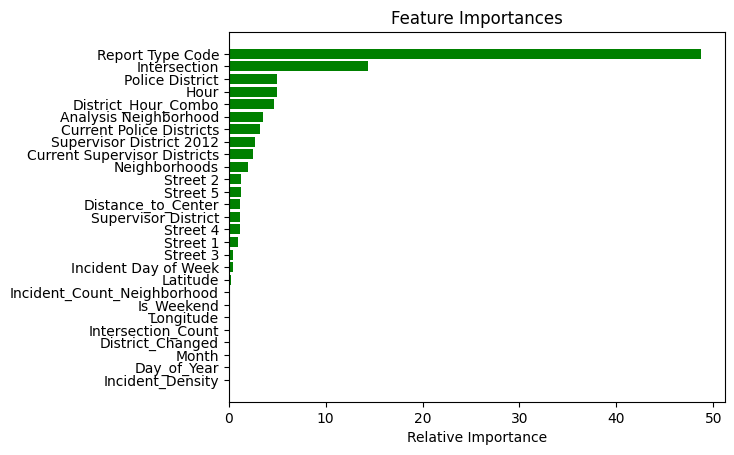

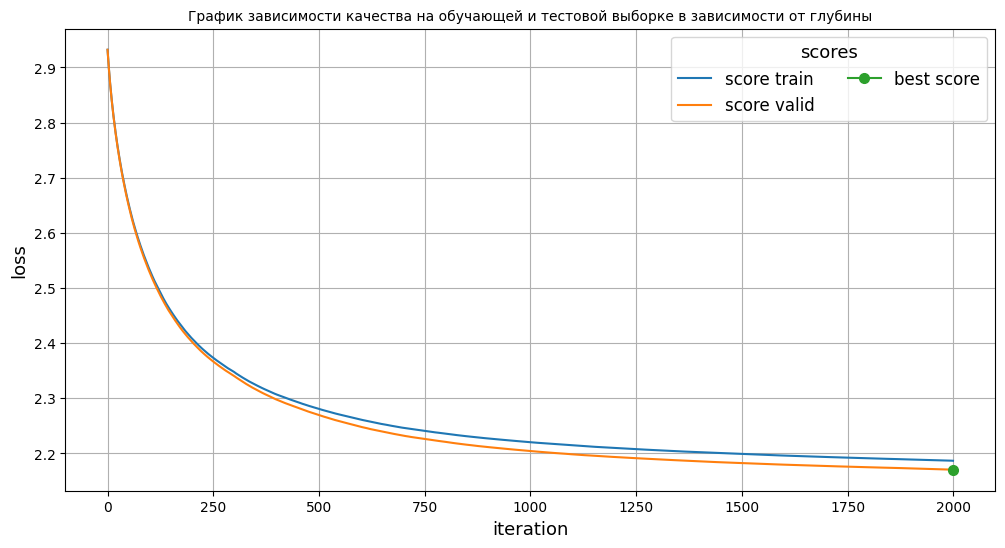

best loss valid: 2.1702643125784946 on iteration 1999


ROC-AUC: 0.7600466335949048
precision macro: 0.26872701023889806
recall macro: 0.23896346348229325
f1 macro: 0.22864268544620756


In [47]:
# {'iterations': 500,
#  'learning_rate': 0.001,
#  'depth': 4,
#  'l2_leaf_reg': 100,
#  'bootstrap_type': 'Bernoulli',
#  'random_strength': 1e-09,
#  'early_stopping_rounds': 10}


cb_params = {
    #'task_type': 'GPU',
    'loss_function' : 'MultiClass',
    'iterations': 2000,
    'learning_rate': 0.005, # вес нового дерева в композиции
    'depth' : 4,
    # 'random_state':42,
    # 'auto_class_weights': 'Balanced',
    # 'eval_metric': 'F1',
    # 'max_depth': 6,
    # 'n_estimators':  300,
    # 'subsample': 0.7,
    'l2_leaf_reg': 10
}

fit_params = {
    'plot': False,
    'early_stopping_rounds': 10,
    'verbose': True
}

trns, clf, metrics, artifacts = train_model(
            df_train= df_train.drop(columns = ['Row ID', 'Incident Datetime']),
            features = ['Incident Day of Week',
       'Report Type Code', 'Intersection', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Neighborhoods',
       'Current Supervisor Districts', 'Current Police Districts', 'target',
       'Street 1', 'Street 2', 'Street 3', 'Street 4', 'Street 5', 'Hour',
       'Month', 'Day_of_Year', 'Is_Weekend', 'Quarter', 'District_Hour_Combo',
       'Time_Since_Last_Incident', 'Distance_to_Center',
       'Incident_Count_Neighborhood', 'Incident_Count_Last_Month',
       'Intersection_Count', 'Most_Common_Report_Type_Neighborhood',
       'Weekend_Incident_Rate', 'Neighborhood_District_Combo',
       'ReportType_Hour_Interaction', 'Supervisor_Hour_Interaction',
       'District_Changed', 'Incident_Density'],
            category_features = ['Incident Day of Week', 'Report Type Code', 'Intersection', 'Police District',
    'Analysis Neighborhood', 'Street 1', 'Street 2', 'Street 3', 'Street 4', 'Street 5',
    'District_Hour_Combo', 'Most_Common_Report_Type_Neighborhood', 'Neighborhood_District_Combo',
    'ReportType_Hour_Interaction', 'Supervisor_Hour_Interaction'],
            target_col = 'target',
            save_model=False,
            plot=True,
            cb_params=cb_params,
            fit_params=fit_params
            )

In [48]:
best_val_score = clf.best_score_['validation']['MultiClass']
best_val_score

2.1702643125784946

In [49]:
artifacts.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'y_test_pred', 'y_test_prob'])

In [50]:
def bootstrap_metric(x, y, metric_fn, samples_cnt=1000, random_state=55) -> np.ndarray:
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True) 
        x_boot = x[poses]
        y_boot = y[poses]
        m_val = metric_fn(x_boot, y_boot) # считаем метрику на бутстрапированных выборках 
        b_metric[it] = m_val # вставляем на нужную позицию значение метрики

    return b_metric

In [51]:
boot_roc_auc = bootstrap_metric(x = artifacts['y_test_prob'],
                                y = artifacts['y_test'].values,
                                metric_fn = lambda x, y: roc_auc_score(y_true=y, y_score=x,  multi_class='ovr'),
                                samples_cnt = 20
                                ) # 1 итерация = 1 секунда

In [52]:
alpha = 0.10
print(
    "ROC-AUC 90%-ci: ",
    np.quantile(boot_roc_auc, q=[alpha / 2, 1 - alpha / 2]))

ROC-AUC 90%-ci:  [0.75786883 0.76162169]


In [53]:
plt.figure(figsize=(16, 6))
sns.boxplot(y = boot_roc_auc,
            x=["model1"]*10,
            )
plt.ylabel("ROC-AUC ", size=20)
plt.tick_params(axis="both", which="major", labelsize=14)
plt.show()

ValueError: All arrays must be of the same length

<Figure size 1600x600 with 0 Axes>

In [56]:
import optuna
from optuna.samplers import RandomSampler

In [59]:
def objective(trial):

    cb_params = {
        'iterations': trial.suggest_categorical('iterations', [100, 200]),
        'learning_rate': trial.suggest_categorical('learning_rate', [1e-3, 0.1]),
        'depth': trial.suggest_categorical('depth', [4, 10]),
        'l2_leaf_reg': trial.suggest_categorical('l2_leaf_reg', [1e-8, 100]),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'random_strength': trial.suggest_categorical('random_strength', [1e-9, 10]),
    }

    fit_params = {
        'early_stopping_rounds': trial.suggest_categorical('early_stopping_rounds', [10, 50]),
        'verbose': True
    }

    _, clf, _, _ = train_model(
            df_train= df_train.drop(columns = ['Row ID', 'Incident Datetime']),
            features = ['Incident Day of Week',
                        'Report Type Code', 
                        'Intersection',
                        'Police District',
                        'Analysis Neighborhood',
                        'Supervisor District',
                        'Supervisor District 2012',
                        'Latitude',
                        'Longitude',
                        'Neighborhoods',
                        'Current Supervisor Districts',
                        'Current Police Districts',
                        'Street 1',
                        'Street 2',
                        'Street 3',
                        'Street 4',
                        'Street 5',
                        'Hour',
                        'Month',
                        'Day_of_Year',
                        'Is_Weekend',
                        'District_Hour_Combo',
                        'Distance_to_Center',
                        'Incident_Count_Neighborhood',
                        'Intersection_Count',
                        'District_Changed',
                        'Incident_Density'],
            category_features = ['Incident Day of Week',
                                'Report Type Code', 
                                'Intersection',
                                'Police District',
                                'Analysis Neighborhood',
                                'Supervisor District',
                                'Supervisor District 2012', 
                                'Neighborhoods',
                                'Current Supervisor Districts',
                                'Current Police Districts',
                                'Street 1',
                                'Street 2',
                                'Street 3',
                                'Street 4',
                                'Street 5',
                                'District_Hour_Combo'],
            target_col = 'target',
            save_model=False,
            plot=False,
            cb_params=cb_params,
            fit_params=fit_params
            )
    
    best_val_score = clf.best_score_['validation']['MultiClass']

    return best_val_score

# Create "exploration"
study = optuna.create_study(
    direction="minimize", study_name="Optimizer", sampler=RandomSampler(42) # хотим минимизировать число, которое возвращаем
)

study.optimize(
    objective, n_trials=1
)  # The more iterations, the higher the chances of catching the most optimal hyperparameters

[I 2024-10-25 10:52:33,538] A new study created in memory with name: Optimizer


(250720, 27) (62680, 27)
0:	learn: 2.9423820	test: 2.9423718	best: 2.9423718 (0)	total: 7.51s	remaining: 24m 55s
1:	learn: 2.9403427	test: 2.9403222	best: 2.9403222 (1)	total: 15s	remaining: 24m 40s
2:	learn: 2.9383207	test: 2.9382901	best: 2.9382901 (2)	total: 21.6s	remaining: 23m 36s
3:	learn: 2.9363158	test: 2.9362751	best: 2.9362751 (3)	total: 28.2s	remaining: 23m 3s
4:	learn: 2.9343277	test: 2.9342769	best: 2.9342769 (4)	total: 34.8s	remaining: 22m 39s
5:	learn: 2.9323560	test: 2.9322952	best: 2.9322952 (5)	total: 41.7s	remaining: 22m 29s
6:	learn: 2.9304005	test: 2.9303298	best: 2.9303298 (6)	total: 48.2s	remaining: 22m 10s
7:	learn: 2.9284609	test: 2.9283803	best: 2.9283803 (7)	total: 55s	remaining: 22m
8:	learn: 2.9265370	test: 2.9264465	best: 2.9264465 (8)	total: 1m 1s	remaining: 21m 51s
9:	learn: 2.9246284	test: 2.9245281	best: 2.9245281 (9)	total: 1m 8s	remaining: 21m 42s
10:	learn: 2.9227350	test: 2.9226248	best: 2.9226248 (10)	total: 1m 15s	remaining: 21m 30s
11:	learn: 2.

[I 2024-10-25 11:15:26,321] Trial 0 finished with value: 2.7020765829559443 and parameters: {'iterations': 200, 'learning_rate': 0.001, 'depth': 4, 'l2_leaf_reg': 100, 'bootstrap_type': 'Bernoulli', 'random_strength': 1e-09, 'early_stopping_rounds': 10}. Best is trial 0 with value: 2.7020765829559443.


In [60]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers', 'name': 'Objective Value', 'type': 'scatter', 'x': [0], 'y': [2.7020765829559443]},
             {'mode': 'lines', 'name': 'Best Value', 'type': 'scatter', 'x': [0], 'y': [2.7020765829559443]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

In [61]:
study.best_params

{'iterations': 200,
 'learning_rate': 0.001,
 'depth': 4,
 'l2_leaf_reg': 100,
 'bootstrap_type': 'Bernoulli',
 'random_strength': 1e-09,
 'early_stopping_rounds': 10}

In [20]:
from umap import UMAP

In [21]:
x_train = artifacts['x_train']

In [22]:
x_train[['Latitude', 'Longitude']].values

array([[  37.78516721, -122.41790141],
       [  37.79916069, -122.43422439],
       [  37.73832136, -122.40564674],
       ...,
       [  37.77964976, -122.49438067],
       [  37.77821277, -122.43505239],
       [  37.76316782, -122.42395924]])

In [23]:
# Initializes UMAP with the PCA components
model = UMAP(
    n_components=2,
    min_dist=1,
    n_neighbors=10,
    init=x_train[['Latitude', 'Longitude']].fillna(0).values,
    # it is recommended to use the first two components of PCA for initialization of UMAP and t-SNE
    n_epochs=10,
    verbose=2,
)

In [24]:
umap = model.fit_transform(x_train[['Latitude', 'Longitude']].fillna(0).values)

UMAP(init=array([[  37.78516721, -122.41790141],
       [  37.79916069, -122.43422439],
       [  37.73832136, -122.40564674],
       ...,
       [  37.77964976, -122.49438067],
       [  37.77821277, -122.43505239],
       [  37.76316782, -122.42395924]]), min_dist=1, n_epochs=10, n_neighbors=10, verbose=2)
Tue Oct 22 20:27:08 2024 Construct fuzzy simplicial set
Tue Oct 22 20:27:08 2024 Finding Nearest Neighbors
Tue Oct 22 20:27:08 2024 Building RP forest with 30 trees
Tue Oct 22 20:27:12 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Tue Oct 22 20:27:27 2024 Finished Nearest Neighbor Search
Tue Oct 22 20:27:29 2024 Construct embedding


Epochs completed:   0%|            0/10 [00:00]

	completed  0  /  10 epochs
	completed  1  /  10 epochs
	completed  2  /  10 epochs
	completed  3  /  10 epochs
	completed  4  /  10 epochs
	completed  5  /  10 epochs
	completed  6  /  10 epochs
	completed  7  /  10 epochs
	completed  8  /  10 epochs
	completed  9  /  10 epochs
Tue Oct 22 20:27:35 2024 Finished embedding


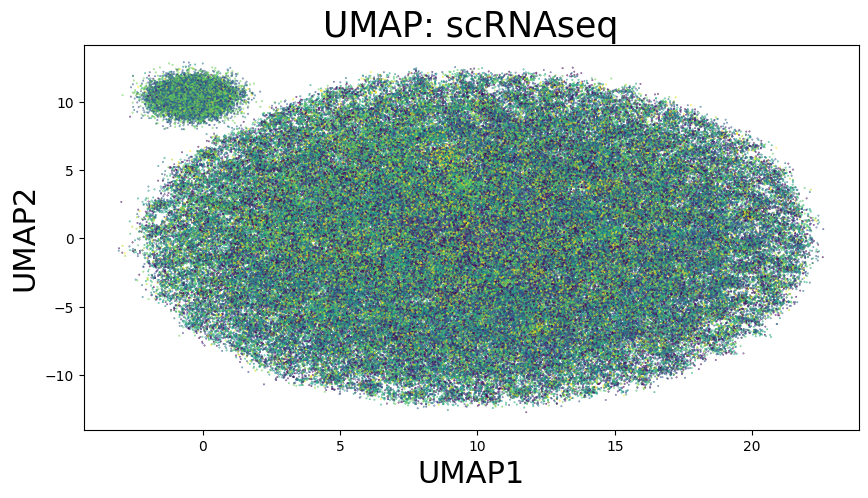

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(umap[:, 0], umap[:, 1], c = artifacts['y_train'], s=0.1)
plt.title("UMAP: scRNAseq", fontsize=25)
plt.xlabel("UMAP1", fontsize=22)
plt.ylabel("UMAP2", fontsize=22)
plt.show()

# Выгрузка submission-a

In [93]:
test_submission = clf.predict_proba(trns.transform(df_test.drop(columns = ['Row ID', 'Incident Datetime'])))

In [94]:
#test_submission = clf.predict_proba(trns.transform(df_test.drop(columns = ['Row ID', 'Incident Datetime'])))
df_test_ss = pd.concat([pd.DataFrame(test_submission), df_test['Row ID']], axis = 1)
df_test_ss.columns = ['pred_0', 'pred_1','pred_2','pred_3','pred_4','pred_5','pred_6','pred_7','pred_8','pred_9','pred_10','pred_11','pred_12','pred_13','pred_14','pred_15','pred_16','pred_17','pred_18', 'id']
df_test_ss_final = df_test_ss[['id', 'pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5', 'pred_6',
                                   'pred_7', 'pred_8', 'pred_9', 'pred_10', 'pred_11', 'pred_12',
                                   'pred_13', 'pred_14', 'pred_15', 'pred_16', 'pred_17', 'pred_18']]
df_test_ss_final.to_csv('cb2.csv', index = False)